Test `json.load(TextIOWrapper)`

In [ ]:
import json

path = r"C:\Users/confocal_microscope\Desktop\{Test}_DataSet\{20230305_NEW_STRUCT}_Academia_Sinica_i409\fish_dataset_horiz_cut_1l2_Mix_AP\DS_SURF3C_CRPS512_SF14_INT20_DRP100_RS2022\{Logs}_train_selected_summary.log"

with open(path, 'r') as f_writer:
    data = json.load(f_writer)
    
data

Concate 2 `List`

In [ ]:
a = [1, 1, 1]
b = [2, 2, 2]

c = a + b

c

When `string` is too long

In [ ]:
a = 1
b = 2
c = 3
d = 4

print((f"load model using 'torch.hub.load()', "
       f"model_name: '{a}', weights: '{b}/{c}/{d}_model.pth'"))

Test `misc_utils.Timer`

In [ ]:
import sys
import time

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from misc_utils import Timer

train_timer = Timer()

train_timer.start()
time.sleep(1)  # import time
train_timer.stop()

train_timer.calculate_consume_time()

train_timer.consume_time

Test `get_sortedClassMapper_from_dir()`

In [ ]:
import sys
import time

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from dl_utils import get_sortedClassMapper_from_dir

path = r"C:\Users\confocal_microscope\Desktop\{Test}_DataSet\{20230305_NEW_STRUCT}_Academia_Sinica_i409\fish_dataset_horiz_cut_1l2_Mix_AP\DS_SURF3C_CRPS512_SF14_INT20_DRP100_RS2022\train\selected"

num2class_list, class2num_dict = get_sortedClassMapper_from_dir(path)
num2class_list, class2num_dict

Test functions in `plt_show` ( input is a `img_path` )

In [ ]:
import sys
import cv2

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
import plt_show

img_path = r"C:\Users\confocal_microscope\Desktop\{Temp}_Data\{20230305_NEW_STRUCT}_Academia_Sinica_i409\{ch4_min_proj, outer_rect}_RGB_preprocess\20220610_CE001_palmskin_8dpf - Series001_fish_1_A_RGB\08_composite_RGB_HE.tif"
image = cv2.imread(img_path)

plt_show.plot_in_rgb(img_path, fig_size=(1920, 1080))
plt_show.plot_in_gray(img_path, fig_size=(1920, 1080))
plt_show.plot_by_channel(img_path, fig_size=(1400, 512))

Try `EarlyStop` ( `try-except*n-else-finally` )

In [ ]:
import os 
import sys
import time
import traceback
from tqdm.auto import tqdm

best_loss = 100
max_no_improved = 5

loss_list = list(range(10, 0, -1))
for i in range(10): loss_list.append(0.1)

pbar_n_epoch = tqdm(total=len(loss_list), desc=f"Epoch ")


try:
    cnt_no_improved = 0
    for loss in loss_list:
        time.sleep(0.3)
            
        if loss < best_loss:
            best_loss = loss
            tqdm.write(f"best loss = {loss}")
        else:
            cnt_no_improved += 1
            print(f"loss = {loss}, cnt_no_improved = {cnt_no_improved}")
            if cnt_no_improved == max_no_improved: 
                sys.exit()
        
        if True: a = 1/0
        
        pbar_n_epoch.update(1)
        pbar_n_epoch.refresh()

except (KeyboardInterrupt, SystemExit) as e: 
    print("An exception occurred: 'KeyboardInterrupt' or 'SystemExit'")
    

except Exception as e:
    print(traceback.format_exc())
    with open("ExceptionError.log", mode="w") as f_writer: f_writer.write(traceback.format_exc())

Test `rename_training_dir()` ( using `os.rename()` )

In [ ]:
import os
import sys
from datetime import datetime
import time

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from fileop import create_new_dir
from dl_utils import rename_training_dir


time_stamp = datetime.now().strftime('%Y%m%d_%H_%M_%S')
orig_dir_path = r"C:\Users\confocal_microscope\Desktop\{Test}_Model_history\vit_b_16"
orig_dir_path = os.path.join(orig_dir_path, f"Training_{time_stamp}")
create_new_dir(orig_dir_path)

time.sleep(5)

rename_training_dir(status="Completed", epochs=50, aug_on_fly=True, use_hsv=True,
                    time_stamp=time_stamp, orig_dir_path=orig_dir_path)

Test `plot_with_imglist()` and `plot_with_imglist_auto_row()`

In [1]:
import os
import sys
import cv2
import numpy as np

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from datasetop import gen_crop_img
import plt_show

img_path = r"C:\Users\confocal_microscope\Desktop\20220628_CE006_palmskin_8dpf - Series005_fish_68_A_RGB.tif"
img = cv2.imread(img_path)


# original
img_tophalf = img[:512, :, :]
img_bottomhalf = img[512:, :, :]
img_list = [img_tophalf, img_bottomhalf]
kwargs_plot_with_imglist = {
    "img_list"   : img_list,
    "row"        : 2,
    "column"     : 1,
    "fig_dpi"    : 100,
    "figtitle"   : "test",
    "save_path"  : r"C:\Users\confocal_microscope\Desktop\新增資料夾\out1.png",
    "show_fig"   : False,
    "verbose"    : True,
}
plt_show.plot_with_imglist(**kwargs_plot_with_imglist)

print("\n", "="*100, "\n")

# Plot with 'Auto Row Calculation'
crop_size = 256
column = 8

crop_img_list = gen_crop_img(img_bottomhalf, crop_size, "1/4")
kwargs_plot_with_imglist_auto_row = {
    "img_list"      : crop_img_list,
    "column"        : column,
    "fig_dpi"       : 200,
    "figtitle"      : f"crop_size : {img_list[-1].shape[:2]}",
    "subtitle_list" : [ f"subplot_{i}" for i in range(len(crop_img_list)) ],
    "save_path"     : r"C:\Users\confocal_microscope\Desktop\新增資料夾\out2.png",
    "show_fig"      : False,
    "verbose"       : True,
}
plt_show.plot_with_imglist_auto_row(**kwargs_plot_with_imglist_auto_row)

figure resolution : 1024.0, 1024.0
fontsize: 51, (title_width, title_height): (98, 37)
background.size <class 'tuple'>: (1024, 1098)


len(img_list): 65 --> 72
figure resolution : 4096.0, 4608.0
fontsize: 230, (title_width, title_height): (5706, 229)
fontsize: 207, (title_width, title_height): (5146, 206)
fontsize: 186, (title_width, title_height): (4613, 185)
fontsize: 167, (title_width, title_height): (4141, 166)
fontsize: 150, (title_width, title_height): (3728, 149)
background.size <class 'tuple'>: (4096, 4906)


Test `cam gallery` ( `draw_predict_ans_on_image()` )

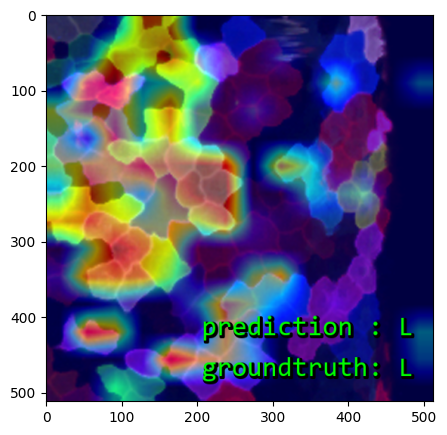

In [19]:
import sys
import yaml

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from gallery_utils import draw_predict_ans_on_image


img_path = r"C:\Users\confocal_microscope\Desktop\{Test_by_fish}_Model_history\vit_b_16\20230403_03_01_49_{Tested}_{84_epochs_AugOnFly}_{best}_{avg_f1_0.89034}\GradCAM_result_with_text\L_fish_111_A\L_fish_111_A_cam_4.tiff"
make_cam_gallery_yaml = r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\make_cam_gallery.yaml"

with open(make_cam_gallery_yaml, mode="r") as f_reader:
    config = yaml.load(f_reader, Loader=yaml.SafeLoader)

# ----- config -----
line_color = config["draw"]["line"]["color"]
line_width = config["draw"]["line"]["width"]

text_correct_color   = config["draw"]["text"]["color"]["correct"]
text_incorrect_color = config["draw"]["text"]["color"]["incorrect"]
text_shadow_color    = config["draw"]["text"]["color"]["shadow"]
text_font_style      = config["draw"]["text"]["font_style"]
text_font_size       = config["draw"]["text"]["font_size"] # if None, do auto-detection
# ----- end of config -----


bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

rgb_img = Image.fromarray(rgb_img)
draw_predict_ans_on_image(rgb_img, "L", "L", 
                          text_font_style, text_font_size,
                          text_correct_color,
                          text_incorrect_color,
                          text_shadow_color)

fig = plt.figure(figsize=(5.12, 5.12), dpi=100)
plt.imshow(np.array(rgb_img))

Compare 2 dataset directory (original, copy)

In [ ]:
import os
import sys
import re
from glob import glob

import cv2


def get_ID_SN(path:str):
    
    fish_name_for_dataset = path.split(os.sep)[-1].split(".")[0]
    fish_name_for_dataset_list = re.split(" |_|-", fish_name_for_dataset)
    
    return int(fish_name_for_dataset_list[2]), fish_name_for_dataset_list[3], int(fish_name_for_dataset_list[5])

    
old_dataset_root = r"C:\Users\confocal_microscope\Desktop"
new_dataset_root = r"C:\Users\confocal_microscope\Desktop\{Test}_DataSet\{20230305_NEW_STRUCT}_Academia_Sinica_i409\fish_dataset_horiz_cut_1l2_Mix_AP"


dataset_name_list = [ 
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\train\selected\L",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\train\selected\M",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\train\selected\S",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\train\drop\L",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\train\drop\M",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\train\drop\S",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\test\selected\L",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\test\selected\M",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\test\selected\S",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\test\drop\L",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\test\drop\M",
    r"DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\test\drop\S",
]

currnet_file = ""

for dataset_name in dataset_name_list:
    
    print(dataset_name)
    
    old_dataset_path = os.path.normpath(f"{old_dataset_root}\{dataset_name}\*.tiff")
    new_dataset_path = os.path.normpath(f"{new_dataset_root}\{dataset_name}\*.tiff")

    old_img_path_list = glob(old_dataset_path)
    new_img_path_list = glob(new_dataset_path)

    old_img_path_list.sort(key=get_ID_SN)
    new_img_path_list.sort(key=get_ID_SN)

    old_img_list = [ cv2.imread(img_path) for img_path in old_img_path_list ]
    new_img_list = [ cv2.imread(img_path) for img_path in new_img_path_list ]

    print(len(old_img_path_list),
          len(new_img_path_list),
          len(old_img_list),
          len(new_img_list))


    try:
        for i in range(len(old_img_list)):
            currnet_file = old_img_path_list[i]
            assert np.array_equal(old_img_list[i], new_img_list[i])
    except:
        print(f"ERROR: {currnet_file}")
    
    print("\n")

In [ ]:
import os
import sys
import re
from typing import List, Dict, Tuple

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from datasetop import sortFishNameForDataset


fish_name_string = {
    "path": r"C:\Users\confocal_microscope\Desktop\{Test_by_fish}_Model_history\vit_b_16\20230403_03_01_49_{Tested}_{84_epochs_AugOnFly}_{best}_{avg_f1_0.89034}\GradCAM_result_with_text\L_fish_111_A\L_fish_111_A_cam_0.tiff",
    "filename": "L_fish_111_A_cam_0.tiff",
    "filename_no_ext": "L_fish_111_A_cam_0"
}

result = {}

for key, value in fish_name_string.items():
    result[key] = sortFishNameForDataset(value)

assert result["path"] == result["filename"] == result["filename_no_ext"]

print(result["path"])

Test of `ImgDataset`

In [ ]:
import os
import sys
from glob import glob
import numpy as np
import cv2

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from logger import init_logger
from fileop import create_new_dir
from datasetop import sortFishNameForDataset
from dl_utils import set_gpu, ImgDataset, caulculate_metrics, save_model, plot_training_trend, \
                     confusion_matrix_with_class, get_sortedClassMapper_from_dir
from cam_utils import reshape_transform, postprocess_cam_image


img_path = r"C:\Users\confocal_microscope\Desktop\{Test}_DataSet\{20230305_NEW_STRUCT}_Academia_Sinica_i409\fish_dataset_horiz_cut_1l2_Mix_AP\DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\test\selected\S"

img_path_list = glob(os.path.normpath(f"{img_path}/*.tiff"))
img_path_list.sort(key=sortFishNameForDataset)

class2num_dict = {
    "L":0, 
    "M":1,
    "S":2
}

test = ImgDataset(img_path_list, class_mapper=class2num_dict, resize=(700, 300), use_hsv=False)
img, cls_idx, imgname_no_ext_list = test.__getitem__(0)

print(img.size(), cls_idx, imgname_no_ext_list)

img = np.moveaxis(img.numpy(), 0, -1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imshow("test", img)
cv2.waitKey(0)

Test `drop gallery` ( draw `x` and `drop_info` )

In [3]:
import sys
from typing import List, Dict, Tuple
from copy import deepcopy
import yaml

import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from gallery_utils import draw_x_on_image, draw_drop_info_on_image


img_path = r"C:\Users\confocal_microscope\Desktop\{Test}_DataSet\{20230305_NEW_STRUCT}_Academia_Sinica_i409\fish_dataset_horiz_cut_1l2_Mix_AP\DS_SURF3C_CRPS256_SF14_INT20_DRP70_RS2022\test\drop\S\S_fish_123_A_drop_0.tiff"
make_crop_gallery_yaml = r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\dataset_generate\make_crop_gallery\make_crop_gallery.yaml"

with open(make_crop_gallery_yaml, mode="r") as f_reader:
    config = yaml.load(f_reader, Loader=yaml.SafeLoader)

# ----- config -----
line_color = config["draw"]["line"]["color"]
line_width = config["draw"]["line"]["width"]

text_selected_color = config["draw"]["text"]["color"]["selected"]
text_drop_color     = config["draw"]["text"]["color"]["drop"]
text_shadow_color   = config["draw"]["text"]["color"]["shadow"]
text_font_style = config["draw"]["text"]["font_style"]
text_font_size  = config["draw"]["text"]["font_size"] # if None, do auto-detection
# ----- end of config -----

intensity = 20 # load from 'dataset_config.yaml'
drop_ratio = 0.7 # load from 'dataset_config.yaml'
dark_ratio = 0.87878787 # load from 'dark_ratio.log'


bgr_img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
rgb_img = np.uint8(rgb_img*0.5) # suppress brightness
print(f'rgb_img {type(rgb_img)}: {rgb_img.shape}')

# rgb_img = cv2.resize(rgb_img, (700, 300))
rgb_img = Image.fromarray(rgb_img)
draw_x_on_image(rgb_img, line_color, line_width)
draw_drop_info_on_image(rgb_img, intensity, dark_ratio, drop_ratio,
                        text_font_style, text_font_size,
                        text_selected_color,
                        text_drop_color,
                        text_shadow_color)

print(f'rgb_img {type(rgb_img)}: {rgb_img.size}')

cv2.imshow("test", cv2.cvtColor(np.array(rgb_img), cv2.COLOR_RGB2BGR))
cv2.waitKey(0)

rgb_img <class 'numpy.ndarray'>: (256, 256, 3)
rgb_img <class 'PIL.Image.Image'>: (256, 256)


-1

Test `shared color bar` ( TODO: )

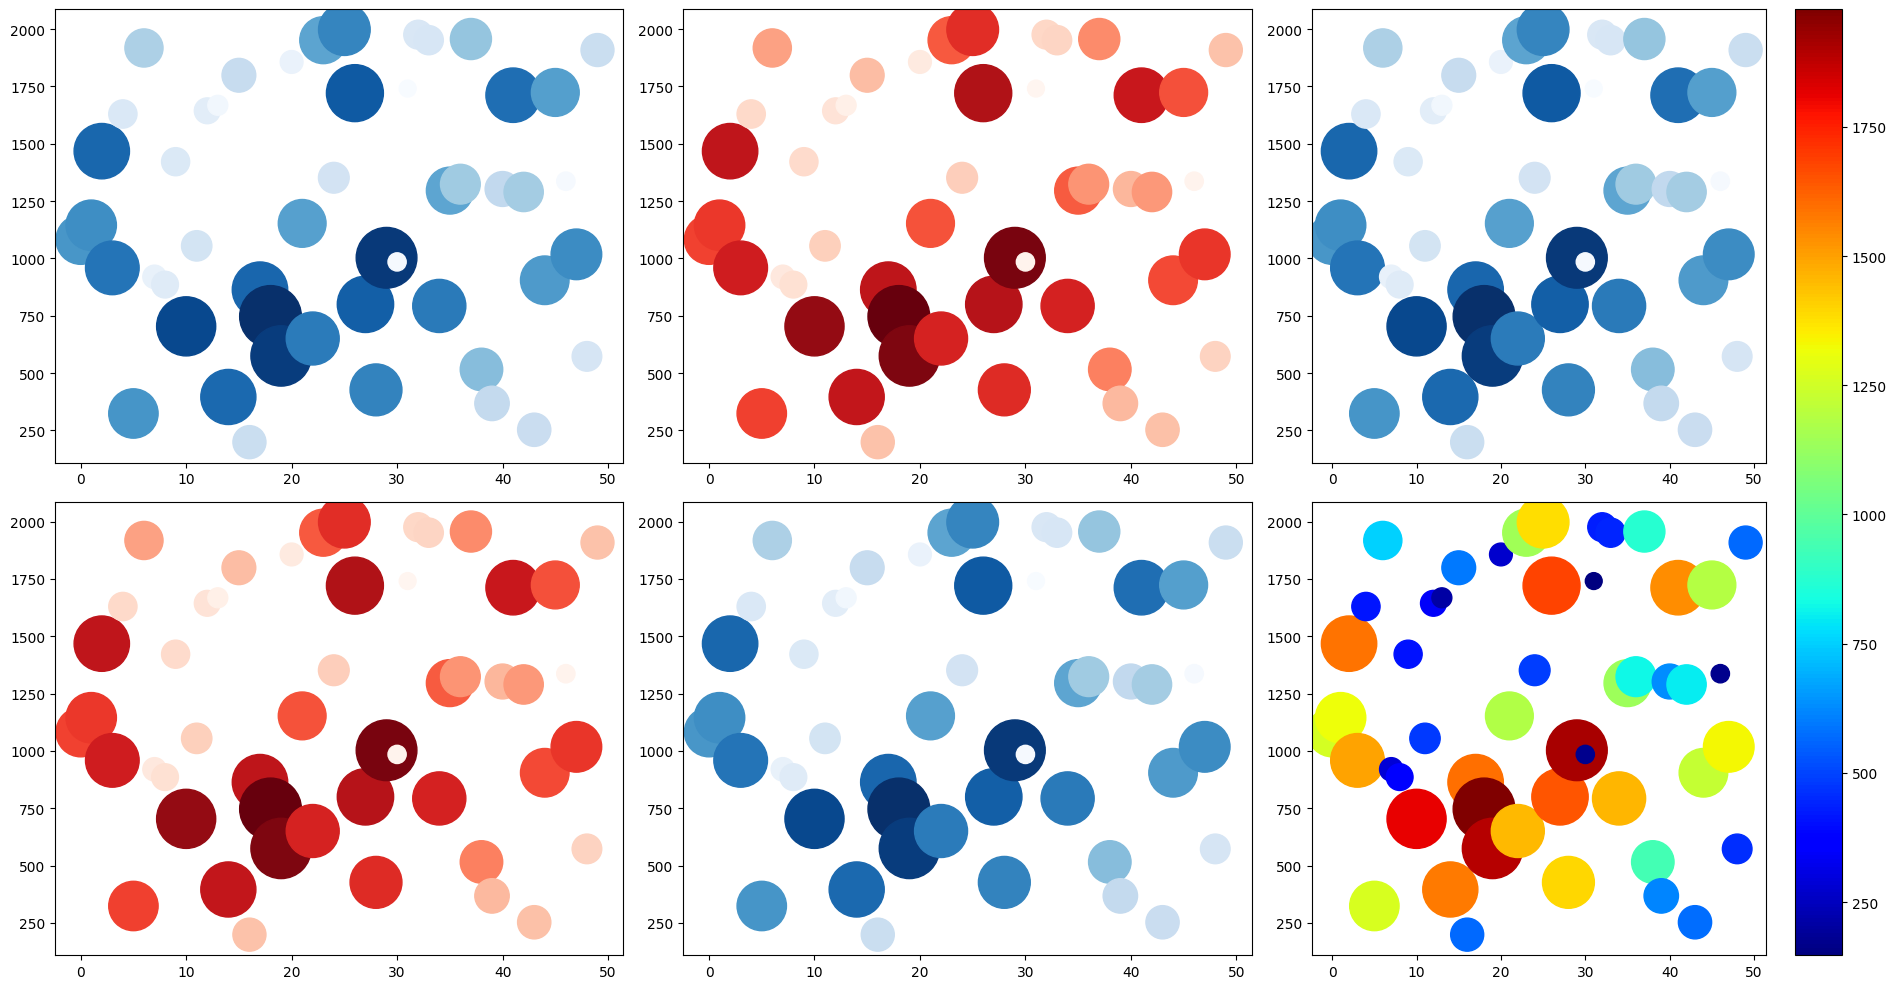

In [19]:
import matplotlib.pyplot as plt
from numpy import random

x = range(0,50)
y = random.randint(100,2000,size=50)
s = random.randint(100,2000,size=50)
fig, ax = plt.subplots(2,3, figsize=(19, 10), dpi=100)
a1 = ax[0, 0].scatter(x, y, s=s, c=s, cmap='Blues')
a2 = ax[0, 1].scatter(x, y, s=s, c=s, cmap='Reds')
a3 = ax[0, 2].scatter(x, y, s=s, c=s, cmap='Blues')
a4 = ax[1, 0].scatter(x, y, s=s, c=s, cmap='Reds')
a5 = ax[1, 1].scatter(x, y, s=s, c=s, cmap='Blues')
a6 = ax[1, 2].scatter(x, y, s=s, c=s, cmap='jet')
fig.tight_layout()
cbar3 = fig.colorbar(a6,ax=[ax[0, 2], ax[1, 2]])     # ax 設定為串列，就能共用一個 colorbar
# cbar3.ax.tick_params(labelsize=18, labelcolor='#00c', direction='in', size=20, width=5, length=1)
cbar3.ax.set_in_layout(False)
plt.show()

Test `overlay cam image` ( 4 different images )

In [ ]:
import os
import sys
import cv2
import numpy as np

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from gallery_utils import postprocess_cam_image


example_cam_dir = r"C:\Users\confocal_microscope\Desktop\{example}_GradCAM\COLORMAP_JET_0.5 (best)\L_fish_111_A_selected_23"

# ----- config -----
colormap = cv2.COLORMAP_JET
image_weight = 0.666
resize = (1024, 1024)
# ----- end of config -----


orig_img_path = os.path.join(example_cam_dir, "4. L_fish_111_A_Original_23.tiff")
grayscale_cam_img_path = os.path.join(example_cam_dir, "1. L_fish_111_A_GrayscaleCam_23.tiff")
colormap_cam_img_path = os.path.join(example_cam_dir, "2. L_fish_111_A_ColorMapCam_23.tiff")


orig_img = cv2.imread(orig_img_path)
grayscale_cam_img = cv2.imread(grayscale_cam_img_path)
colormap_cam_img = cv2.imread(colormap_cam_img_path)


postprocess_cam_image_kwargs = {
    "image": orig_img/255,
    "grayscale_cam": grayscale_cam_img/255,
    "use_rgb": False,
    "colormap": colormap,
    "image_weight": image_weight,
    "cam_save_path": os.path.join(example_cam_dir, "3.2 L_fish_111_A_OverlayCam_23.tiff"),
    "pred_cls": "L",
    "gt_cls": "M",
    # "resize": resize,
    # "font_style": "arial"
    # "font_size": 20,
}
postprocess_cam_image(**postprocess_cam_image_kwargs)


overlay_cam3_img = (colormap_cam_img/255)*(1-image_weight) + (orig_img/255)*image_weight
overlay_cam3_img = np.uint8(255 * overlay_cam3_img)
overlay_cam3_img_path = os.path.join(example_cam_dir, "3.3 L_fish_111_A_OverlayCam_23.tiff")
cv2.imwrite(overlay_cam3_img_path, overlay_cam3_img)

Test `locals()`

In [ ]:
x = 5

def my_function(x):
    if x == 5: x=7
    y = 2
    variables = locals()
    z = 3
    return variables

print(x)
# print(y)
# print(z)

result = my_function(x)
print(result)

(matplotlib) Find `fonts` in system

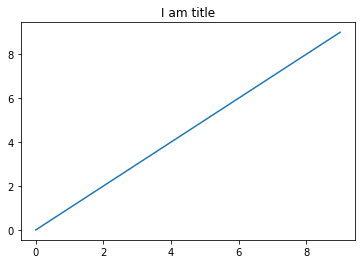

['sans-serif']
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']

FontEntry(fname='C:\\Users\\confocal_microscope\\AppData\\Roaming\\Python\\Python38\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')
FontEntry(fname='C:\\Users\\confocal_microscope\\AppData\\Roaming\\Python\\Python38\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')
FontEntry(fname='C:\\Users\\confocal_microscope\\AppData\\Roaming\\Python\\Python38\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')
FontEntry(fname='C:\\Users\\confoc

In [5]:
from matplotlib import pyplot as plt
from matplotlib import font_manager

plt.plot(range(10))
plt.title("I am title")
plt.show()

print(plt.rcParams["font.family"])
print(plt.rcParams['font.sans-serif']) # 預設使用 list 的第一個 font set

print("="*100, "\n")

for font in font_manager.fontManager.ttflist: 
    
    print(font)
    # print(font.name, "|", font.fname)
    
    # - Note:
    #   回傳的 font.name 是集合的名稱，以 consola 舉例：
    #   "consola" 有四種： [ consola.ttf, consolai.ttf, consolab.ttf, consolaz.ttf ]
    #   font.name 會以 `Consolas` 表示
    #   "DejaVu Sans" 也有四種：[ DejaVuSans.ttf, DejaVuSans-Bold.ttf, 
    #                             DejaVuSans-Oblique.ttf, DejaVuSans-BoldOblique.ttf ]
    #   font.name 會以 `DejaVu Sans` 表示
    # 
    #   >> `plt` 修改 `rcParams['font.sans-serif']` 時要以 font.name 作為 value
    #   >> `pillow` (PIL) 建立 ImageFont 時要使用 tff 的檔案名稱作為 value


print("="*100, "\n")

font_list = font_manager.findSystemFonts()
for font in font_list:
    print(font)

Get y section ( `label` + `ticks` ) bounding box

In [ ]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 5, 6])
ax.set_ylabel("y label")

# 让 plt 自动计算 y 刻度的宽度和高度
fig.canvas.draw()
bbox = ax.yaxis.get_tightbbox(fig.canvas.get_renderer())

# 获取 y 刻度标签所占用的宽度和高度
y_width, y_height = bbox.width, bbox.height

print("y 刻度标签宽度：", y_width)
print("y 刻度标签高度：", y_height)


Plot figure ( `plt` ) and draw figure title ( `pillow` )

y 刻度標籤寬度： 22.0
y 刻度標籤寬度： 178.94949494949498
cv_img_bgra.shape <class 'tuple'>: (500, 1000, 4)
fontsize: 25, (title_width, title_height): (196, 18)
background.size <class 'tuple'>: (1000, 536)
fontsize: 55, (title_width, title_height): (420, 40)


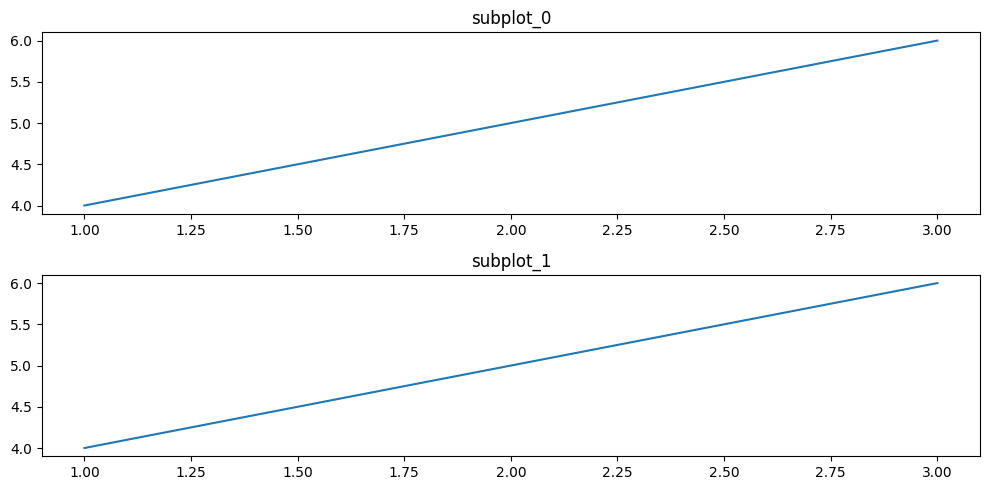

In [1]:
import sys
import io
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
from plt_show import plt_to_pillow, add_big_title, calculate_opti_title_param

# 畫圖
fig, axs = plt.subplots(2, 1, figsize=(10, 5), dpi=100)

for i, ax in enumerate(axs.flatten()):
    ax.plot([1, 2, 3], [4, 5, 6])
    ax.set_title(f"subplot_{i}")

fig.tight_layout()
# hspace = 0.2
# fig.subplots_adjust(hspace=hspace)

# -------------------------------------------------------------------------------------

# 让 plt 自动计算 y 刻度的宽度和高度
fig.canvas.draw()
bbox = ax.yaxis.get_tightbbox(fig.canvas.get_renderer())

# 获取 y 刻度标签所占用的宽度和高度
y_width, y_height = bbox.width, bbox.height

print("y 刻度標籤寬度：", y_width)
print("y 刻度標籤寬度：", y_height)

# -------------------------------------------------------------------------------------

pil_img_rgba = plt_to_pillow(fig)

# 轉成 OpenCV
cv_img_rgba = np.array(pil_img_rgba)
# cv_img_rgb = cv_img_rgba[:, :, :3] # RGBA -> RGB
cv_img_bgra = cv2.cvtColor(cv_img_rgba, cv2.COLOR_RGBA2BGRA)
# cv_img_bgr = cv_img_rgba[:, :, 2::-1] # RGBA -> BGR
print(f'cv_img_bgra.shape {type(cv_img_bgra.shape)}: {cv_img_bgra.shape}')

cv2.imwrite("test.png", cv_img_bgra)
# cv2.imshow("plt -> PIL -> cv2", cv_img_bgra)
# cv2.waitKey(0)

# -------------------------------------------------------------------------------------
title_line_height = 2
image_with_title = add_big_title(pil_img_rgba, "I am BIG title", title_line_height, 
                                 ylabel_width=y_width, verbose=True)

title_width, title_height, font = calculate_opti_title_param("I am BIG title", pil_img_rgba.width*0.95, 55, verbose=True)

# 顯示或存檔
image_with_title.show()
image_with_title.save(f"test{title_line_height}.png")

Compare `os.path.join()` and `os.path.normpath()`

In [46]:
from glob import glob

path = r"C:\Users\confocal_microscope\Desktop/{Test_by_fish}_Model_history\vit_b_1/20230404_11_36_06_{Tested}_{54_epochs_AugOnFly}_{best}_{avg_f1_0.90606}\cam_result"
pathjoin = os.path.join(path, f"*{os.sep}")
pathnorm = os.path.normpath(f"{path}/*/") # 最尾部的 '/' 也會被消掉

print(pathjoin)
print(pathnorm)

C:\Users\confocal_microscope\Desktop/{Test_by_fish}_Model_history\vit_b_1/20230404_11_36_06_{Tested}_{54_epochs_AugOnFly}_{best}_{avg_f1_0.90606}\cam_result\*\
C:\Users\confocal_microscope\Desktop\{Test_by_fish}_Model_history\vit_b_1\20230404_11_36_06_{Tested}_{54_epochs_AugOnFly}_{best}_{avg_f1_0.90606}\cam_result\*


Try `getattr()`

In [22]:
import cv2

# 從 config 中獲取設定值
config_value = 'cool'

# 將常量名稱轉換為屬性名稱
attr_name = f'COLORMAP_{config_value.upper()}'

# 使用 getattr 函式獲取對應的常量
colormap = getattr(cv2, attr_name)

if colormap is None:
    raise ValueError(f'Invalid colormap: {config_value}')

print(colormap)


# ----------------------------------------------------------------------

# getatt() 也可以用於獲取 "方法" 或 "類別"

import sys

sys.path.append(r"C:\Users\confocal_microscope\Desktop\ZebraFish_AP_POS\modules") # add path to scan customized module
import dl_utils

transform = getattr(dl_utils, 'compose_transform')
fish_dataset = getattr(dl_utils, 'ImgDataset')

transform = transform()
dataset = fish_dataset()

8


TypeError: __init__() missing 4 required positional arguments: 'paths', 'class_mapper', 'resize', and 'use_hsv'